# K-Nearest Neighbors (K-NN)

# Importing the libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [3]:
mush = pd.read_csv("mushrooms.csv")
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#Mengecek apakah terdapat nilai null 
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
#Mengecek banyaknya baris dan kolom 
mush.shape

(8124, 23)

In [7]:
#Berapa banyak Edible dan Posion dalam dataset 
mush['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# DATA VISUALIZATION

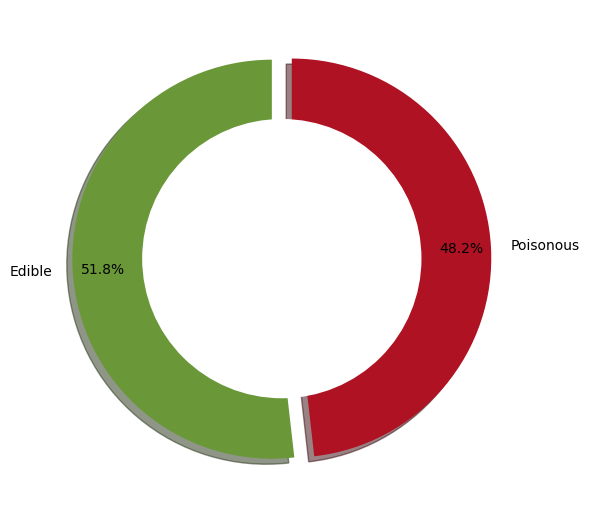

In [8]:
# Menampilkan visualisasi berupa pie chart data banyaknya nilai edible dan poisonous
plt.figure(figsize = (6,6))
plt.pie(mush['class'].value_counts(), colors = ['#6A9838','#af1222'], labels = ['Edible', 'Poisonous'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05), shadow = True)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

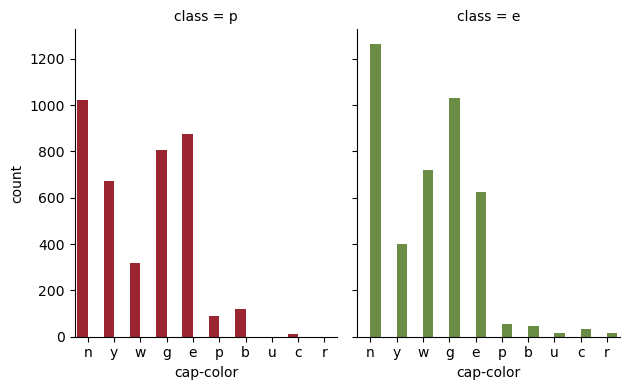

In [9]:
#Menampilkan visulisasi data berupa diagram batang korelasi antara cap color dengan edible dan poisonous
sns.catplot(x="cap-color", hue="class", col="class",data=mush, kind="count",height=4, aspect=.8,palette =['#af1222','#6A9838']);

# PREPROCESSING

In [10]:
#preprocessing - mengubah values menjadi angka dengan label encoder
def Label_enc(feat):
    LabelE = LabelEncoder()
    LabelE.fit(feat)
    print(feat.name,LabelE.classes_)
    return LabelE.transform(feat)

In [11]:
for col in mush.columns:
    mush[str(col)] = Label_enc(mush[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [12]:
#Menampilkan atribut values yang sudah diubah
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


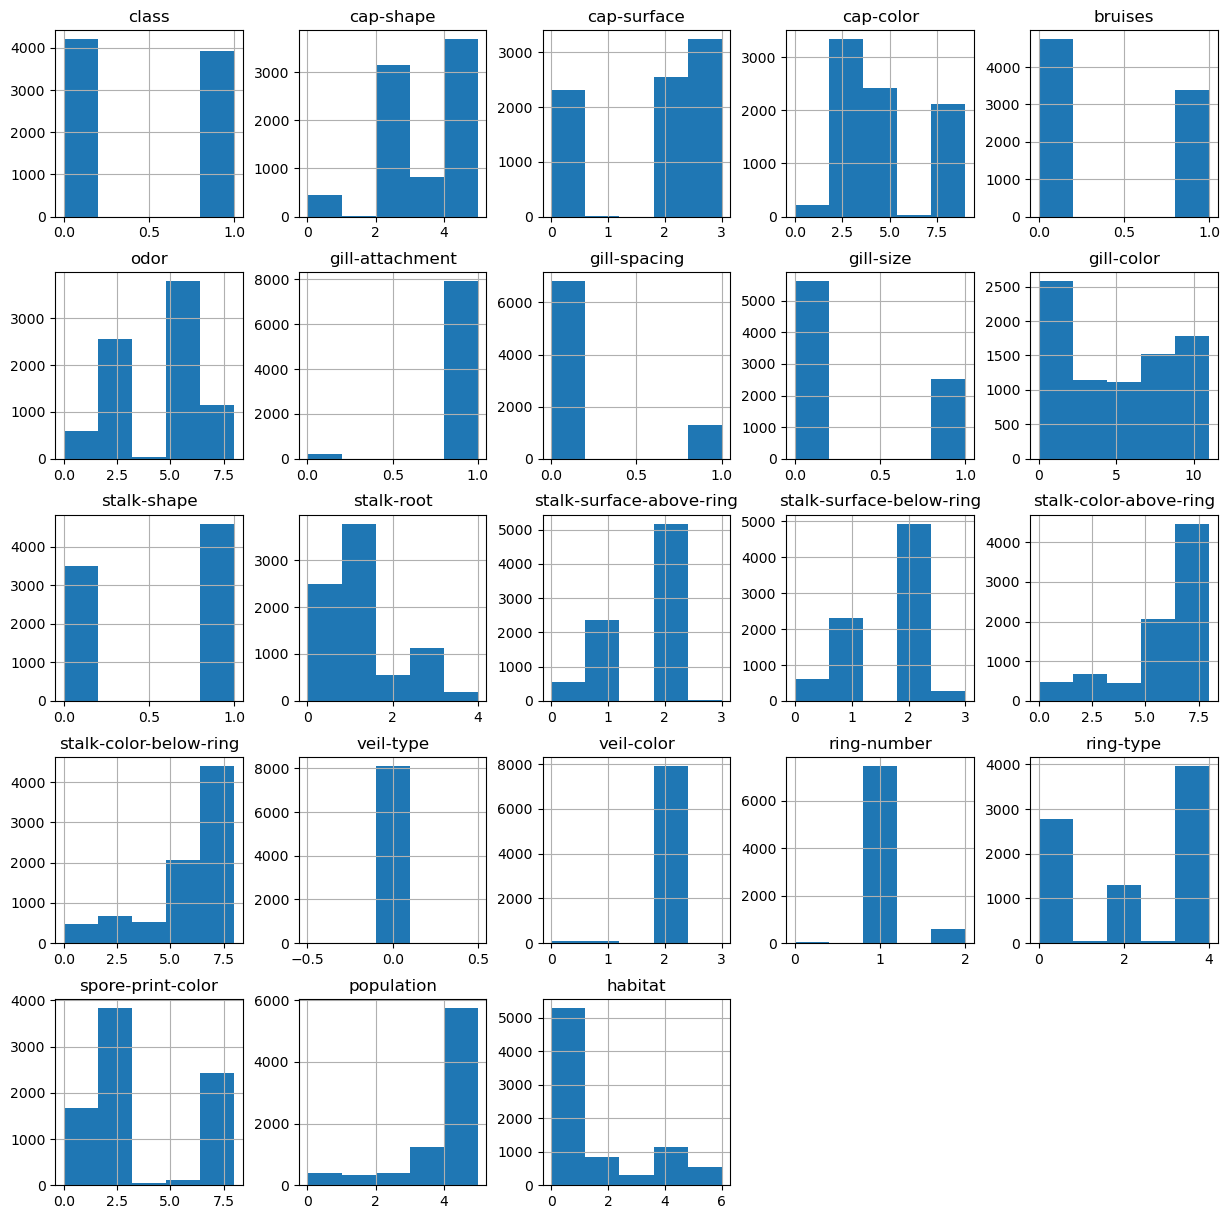

In [13]:
#Melihat fitur atau atribut dengan visualisasi
mush.hist(bins=5, figsize=(15,15));

In [14]:
#Dari visualisasi atribut diatas, dapat dilihat bahwa veil-type tidak berguna karena tidak ada data yang dibutuhkan
del mush['veil-type']

In [15]:
#Split data menjadi y dan x tanpa class
y = mush['class']
X = mush.drop('class', axis=1)

In [16]:
#Menampilkan data setelah menghapus veil-type dan class
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [17]:
#Standarisasi fitur dengan menghapus rata-rata dan penskalaan ke varian satuan
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [18]:
#Menampilkan data yang sudah di StandardScale
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


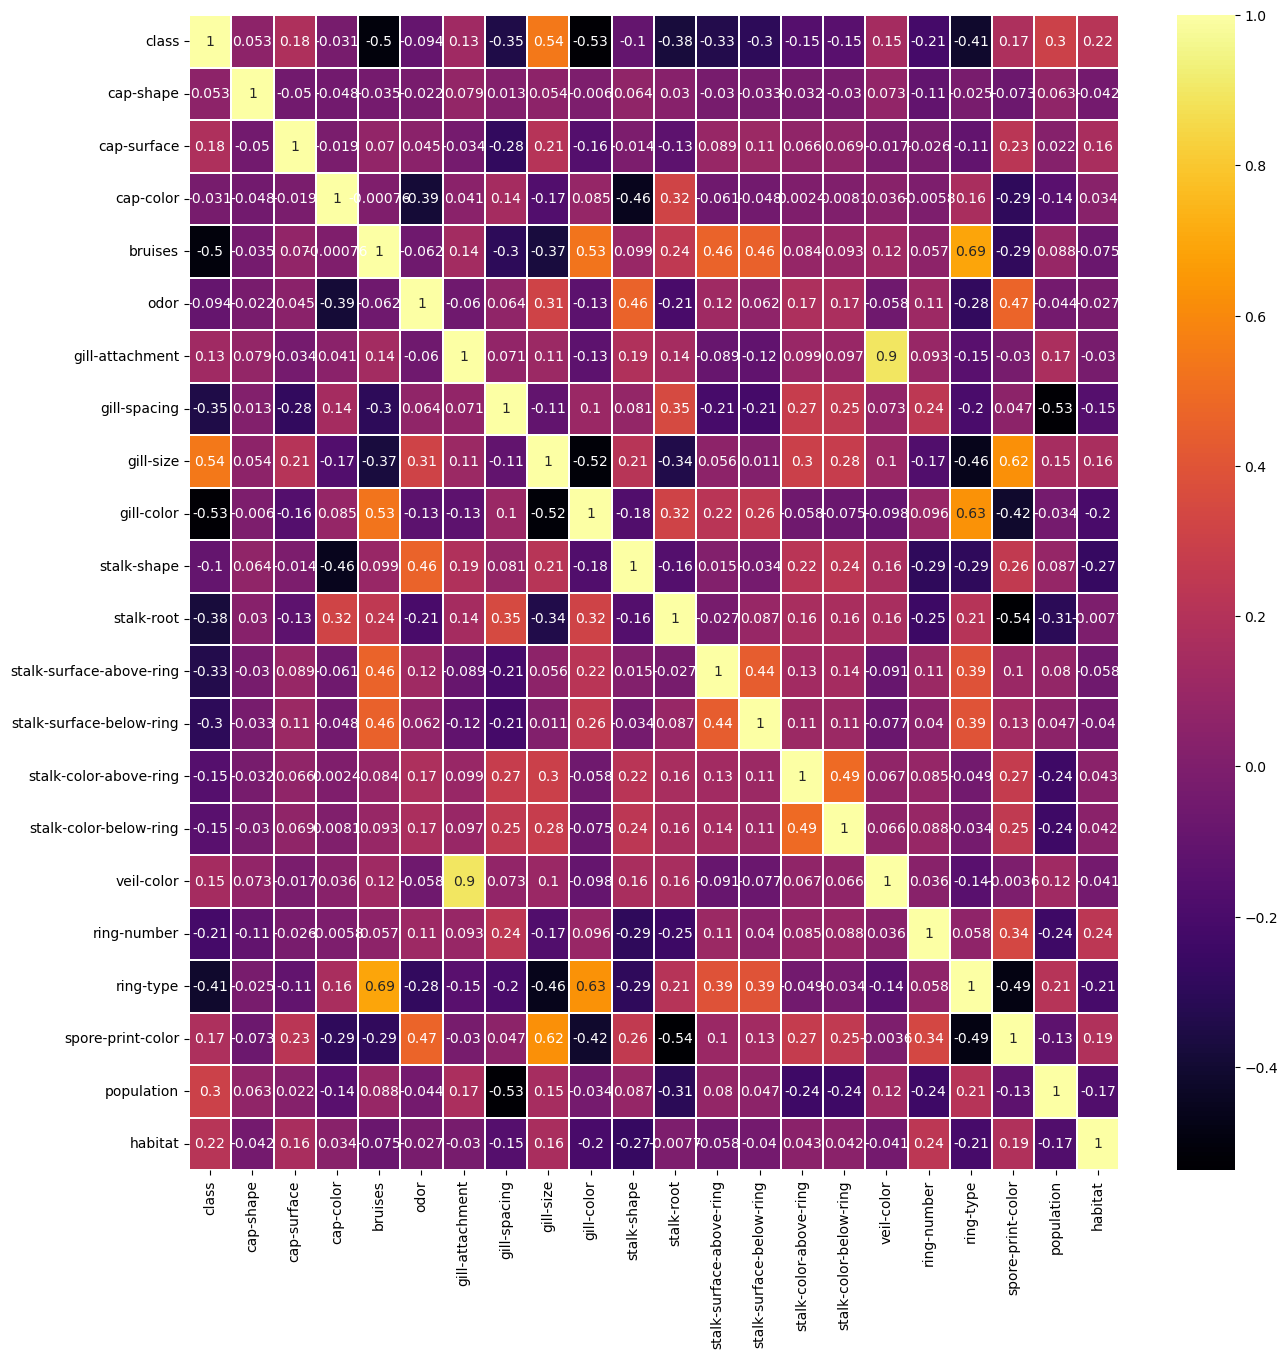

In [19]:
#Heatmap semua fitur atau atribut
plt.figure(figsize=(15,15))
sns.heatmap(mush.corr(),linewidths=.1,cmap="inferno", annot=True);

# Splitting the dataset into the Training set and Test set

In [20]:
#split data dan train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
print('Train data: ', len(X_train)/len(X))
print('Test data: ', X_test.shape[0]/y.shape[0])

Train data:  0.75
Test data:  0.25


In [21]:
#Menampilkan banyaknya baris dan kolom pada data train dan test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6093, 21) (2031, 21) (6093,) (2031,)


# KNN

In [22]:
#knn classifier with for loop [1-20] to check the best accuracy of n
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(n,knn.score(X_test,y_test)))

KNeighborsClassifier: n = 1 , Accuracy is: 1.0
KNeighborsClassifier: n = 2 , Accuracy is: 1.0
KNeighborsClassifier: n = 3 , Accuracy is: 1.0
KNeighborsClassifier: n = 4 , Accuracy is: 1.0
KNeighborsClassifier: n = 5 , Accuracy is: 1.0
KNeighborsClassifier: n = 6 , Accuracy is: 1.0
KNeighborsClassifier: n = 7 , Accuracy is: 1.0
KNeighborsClassifier: n = 8 , Accuracy is: 1.0
KNeighborsClassifier: n = 9 , Accuracy is: 1.0
KNeighborsClassifier: n = 10 , Accuracy is: 1.0
KNeighborsClassifier: n = 11 , Accuracy is: 1.0
KNeighborsClassifier: n = 12 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 13 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 14 , Accuracy is: 0.9985228951255539
KNeighborsClassifier: n = 15 , Accuracy is: 0.9985228951255539
KNeighborsClassifier: n = 16 , Accuracy is: 0.9985228951255539
KNeighborsClassifier: n = 17 , Accuracy is: 0.9985228951255539
KNeighborsClassifier: n = 18 , Accuracy is: 0.9980305268340719
KNeighborsClassifier: n = 19 , Accuracy is

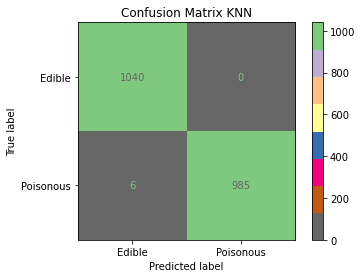

In [23]:
#plot confusion matrix KNN 
plot_confusion_matrix(knn, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix KNN')
plt.show()

In [24]:
#Menampilkan Confusion matrix Accuracy KNN
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_pred)))

Confusion matrix Accuracy is: 0.9970457902511078


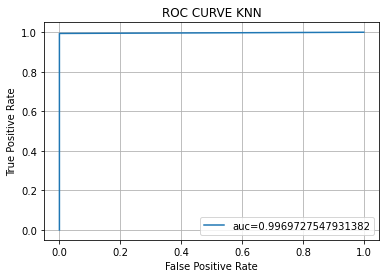

The Score for the ROC Curve is : 99.7%


In [25]:
#roc_curve plot untuk mengecek score knn
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [26]:
#classification report KNN
KNN_REPORT = classification_report(y_test, knn.predict(X_test))
print(KNN_REPORT)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1040
           1       1.00      0.99      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [27]:
#Cross Val Score KNN
cvs = cross_val_score(knn, X, y, cv=20)
cvs

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99753695, 1.        , 1.        , 0.99014778, 0.98029557,
       0.98029557, 0.99753695, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99014778, 0.99261084])